# Linear regression using Pytorch 

review linear regression using NumPy from previous notebook 

In [2]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt

## Data Generation

In [3]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42) # (The Story of Seed(42)) https://medium.com/@leticia.b/the-story-of-seed-42-874953452b94

# randomly generate x which is avector of 100 points 
x = np.random.rand(100, 1)

# define exact linear function y = 1 + 2x + epsilon where epsilon (0.1*random numbers)
# 1 = y-intercept 
# 2 = slope 
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

In [4]:
print(len(x))

100


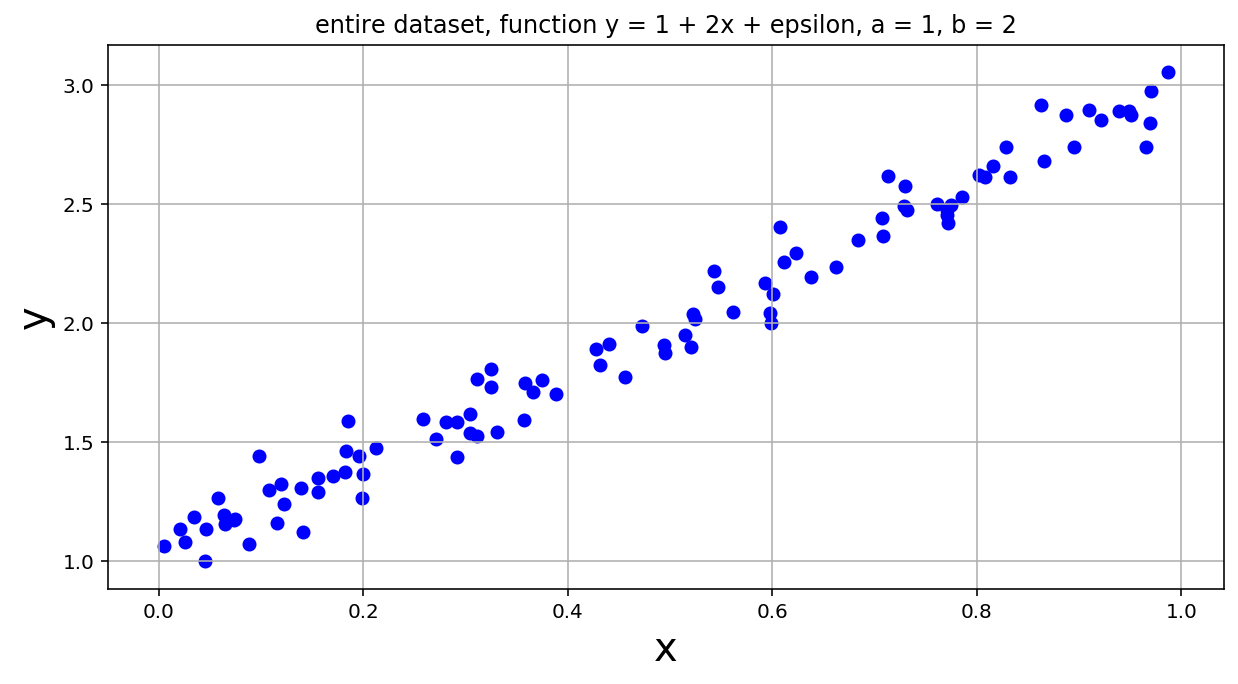

In [5]:
plt.figure(figsize=(10,5))

# plot the entire data set 
plt.scatter(x,y, c='blue')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('entire dataset, function y = 1 + 2x + epsilon, a = 1, b = 2')
plt.grid('on')

## split data into train and validation sets (80/20)

you give 80% of the data points to the computer to learn and predict the line equation y = b0 + b1*x

you will use 20% of the dataset to test how good the algorithm is.

In [6]:
idx = np.arange(100)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [7]:
# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)
print(idx)

[76 83 80 98  2 77 71 84 89 50 40 51 67 86 37 49  4 10 69 81  9 54 55 87
 64 44 90 75 33 30 93 95 14 61 11 13 15  7  0 19 35  6 12 65 70 88 56 58
 28 38 91 42  8 73 39 85 25 92 41 26  1 22 21 46 74 79 78 72 57 53 24 17
 66 32 31 62 59 52 82 23 36  5 45 99 43 16 48 94 34  3 18 47 60 68 63 27
 96 29 20 97]


In [8]:
# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


In [9]:
print(len(x_train))
print(len(y_train))

80
80


In [10]:
print(len(x_val))
print(len(y_val))

20
20


## plot the train and validation sets

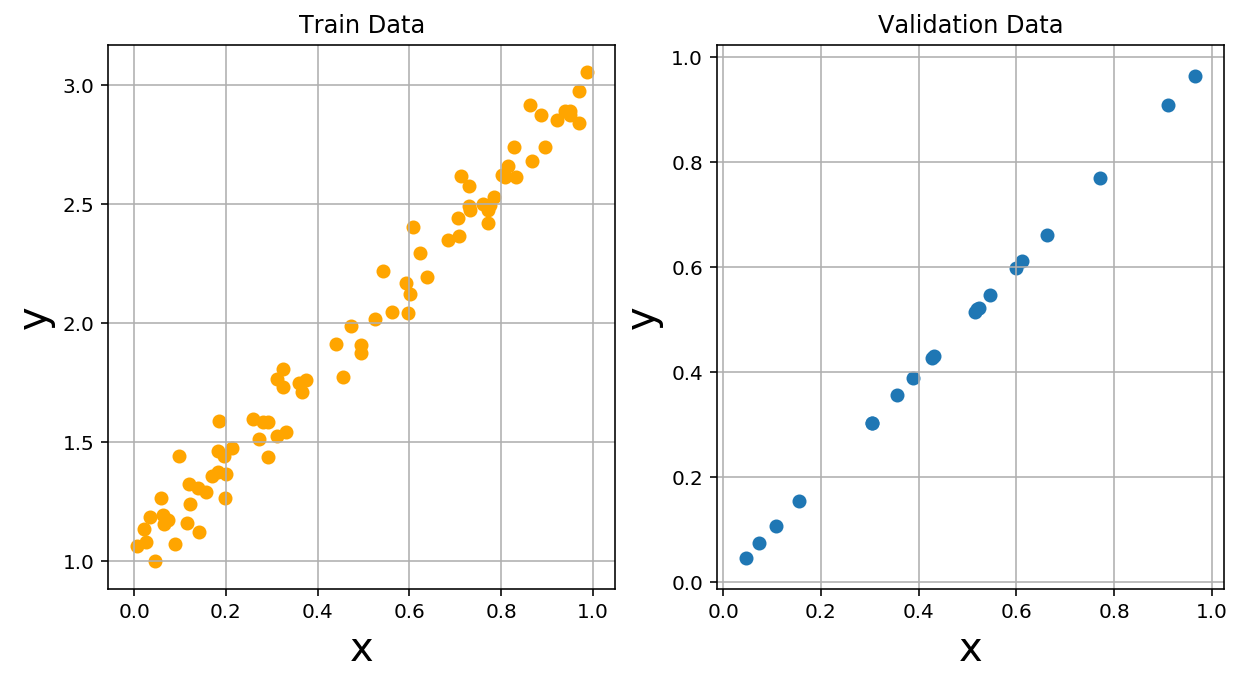

In [11]:
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Train Data')
plt.grid('on')

# plot the validation set 
plt.subplot(1,2,2)
plt.scatter(x_val,x_val)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Validation Data')
plt.grid('on')

plt.show()

## linear regression using NumPy 

In [12]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42)

# Initializes parameters "a" and "b" randomly 
a = np.random.randn(1)
b = np.random.randn(1)

# print values of a and b 
print(a, b)


[0.49671415] [-0.1382643]


In [13]:
# Initialization of hyper-parameters (in our case, only learning rate and number of epochs)

# Sets learning rate
lr = 1e-1
# Defines number of epochs|
n_epochs = 1000

### For each epoch, there are 5 training steps:
* Compute model’s predictions 
* Compute the error (the difference between the actual value and predicted value) 
* Compute the loss ( mean square error = the average of (error)^2)
* Compute the gradients for every parameter (require calculus)
* Update the parameters a and b

In [14]:
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad  # new parameter a = old parameter a - learning rate * gradient of a
    b = b - lr * b_grad
    
print(a, b)

[1.02354094] [1.96896411]


## check our results use Scikit-learn's linear regression

Just to make sure we haven’t done any mistakes in our code, we can use Scikit-Learn’s Linear Regression to fit the model and compare the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


## The results!

They match up to 6 decimal places — we have a fully working implementation of linear regression using NumPy.

# Linear regression using PyTorch

## Loading Data, Devices and CUDA

In [16]:
# import libraries 

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

In [17]:
# Devices and CUDA
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
type(x_train)

numpy.ndarray

In [19]:
# load data 

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

In [20]:
type(x_train_tensor)

torch.Tensor

In [21]:
# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


## Creating Parameters

In [22]:
# 1st method

# FIRST
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)  # .to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)
# Sorry, but NO! The to(device) "shadows" the gradient...

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([0.2345], requires_grad=True) tensor([0.2303], requires_grad=True)


In [23]:
# 2nd method 

# FIRST
# We can either create regular tensors and send them to the device (as we did with our data)
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)

# SECOND
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-1.1229], requires_grad=True) tensor([-0.1863], requires_grad=True)


In [24]:
# 3rd method (it is much better to assign tensors to a device at the moment of their creation.)

# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


## Autograd


Autograd is PyTorch’s automatic differentiation package. Thanks to it, we don’t need to worry about calculating the loss, gradient stuffs

So, how do we tell PyTorch to do its thing and compute all gradients? we use the function .backward()

and how to update the parameters a and b? we use the function .zero_()

In [25]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs|
n_epochs = 1000

In [26]:
# Initializes parameters "a" and "b" randomly (using the 3rd method above)
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(a,b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [27]:
for epoch in range(n_epochs):
    
    yhat = a + b * x_train_tensor  # prediction 
    error = y_train_tensor - yhat  # error = difference between (actual value and predicted value)
    loss = (error ** 2).mean()     # loss (MSE)

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward() # use the function .backward()
#     # Let's check the computed gradients...
#     print(a.grad)
#     print(b.grad)
    
    # What about UPDATING the parameters? Not so fast...
    
    # FIRST METHOD
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND METHOD
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD METHOD
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


## Dynamic Computation Graph

The PyTorchViz package and its make_dot(variable) method allows us to easily visualize a graph associated with a given Python variable.

In [28]:
# let’s stick with two (gradient computing) tensors for our parameters, predictions, errors and loss.
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # parameter a
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # parameter b

yhat = a + b * x_train_tensor  # prediction 
error = y_train_tensor - yhat  # error
loss = (error ** 2).mean()     # loss 

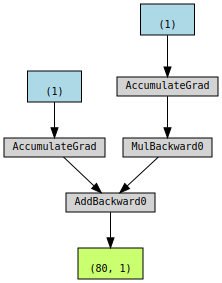

In [29]:
make_dot(yhat)

Let’s take a closer look at its components:

* blue boxes: these correspond to the tensors we use as parameters, the ones we’re asking PyTorch to compute gradients for;

* gray box: a Python operation that involves a gradient-computing tensor or its dependencies;

* green box: the same as the gray box, except it is the starting point for the computation of gradients (assuming the backward()method is called from the variable used to visualize the graph)— they are computed from the bottom-up in a graph.

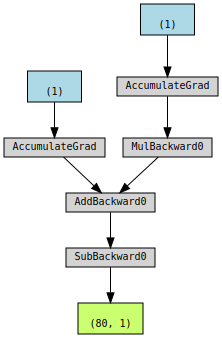

In [30]:
make_dot(error)

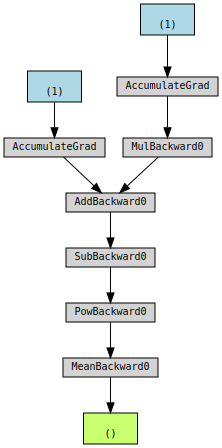

In [31]:
make_dot(loss)

### graphs for the prediction - yhat (left) the error (center) and loss (right) variables, 

* The only difference among them is the number of intermediate steps (gray boxes).

* look at the green box of the left-most graph: there are two arrows pointing to it, since it is adding up two variables, a and b*x. Seems obvious, right?

* look at the gray box of the same graph: it is performing a multiplication, namely, b*x. But there is only one arrow pointing to it! The arrow comes from the blue box that corresponds to our parameter b.

* Why don’t we have a box for our data x? The answer is: we do not compute gradients for it! So, even though there are more tensors involved in the operations performed by the computation graph, it only shows gradient-computing tensors and its dependencies.


<center />
<img src="https://miro.medium.com/max/1400/1*K2QnR_TRF9XfqNgNGDRqng.png" width=660 height=660 />



## Optimizer

So far, we’ve been manually updating the parameters using the computed gradients. That’s probably fine for two parameters… but what if we had a whole lot of them?! We use one of PyTorch’s optimizers, like SGD or Adam.

An optimizer takes the parameters we want to update, the learning rate we want to use (and possibly many other hyper-parameters as well!) and performs the updates through its step() method.

Besides, we also don’t need to zero the gradients one by one anymore. We just invoke the optimizer’s zero_grad() method and that’s it!

In the code below, we create a Stochastic Gradient Descent (SGD) optimizer to update our parameters a and b.

In [32]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)


tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [33]:
lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


## Loss

We now tackle the loss computation. As expected, PyTorch got us covered once again. There are many loss functions to choose from, depending on the task at hand. Since ours is a regression, we are using the Mean Square Error (MSE) loss.

In [34]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [35]:
lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


# stop here. we need to learn how to create python class/object first